# 可视化探索语义分割数据集

同济子豪兄 2023-1-31 6-10 6-11

## 导入工具包

In [1]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [2]:
Dataset_folder = 'Watermelon87_Semantic_Seg_Mask'

In [3]:
# 指定单张图像路径
img_path = Dataset_folder + '/img_dir/train/o0833068314488481500.jpg'
mask_path = Dataset_folder + '/ann_dir/train/o0833068314488481500.png'

In [4]:
# Image.open(img_path)

In [5]:
# Image.open(mask_path)

In [6]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [7]:
img.shape

(683, 833, 3)

In [8]:
mask.shape

(683, 833, 3)

In [9]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

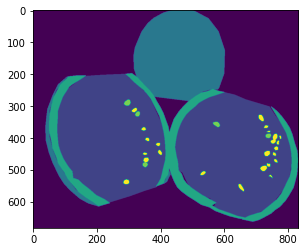

In [10]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

In [11]:
cv2.imwrite('mask_vis.jpg', mask*100)

True

## 叠加在原图上显示

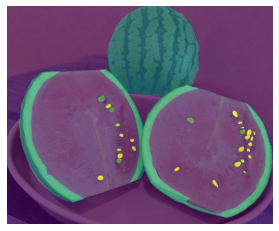

In [12]:
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.7) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

## 批量可视化图像和标注

In [13]:
# 指定图像和标注路径
PATH_IMAGE = Dataset_folder + '/img_dir/train'
PATH_MASKS = Dataset_folder + '/ann_dir/train'

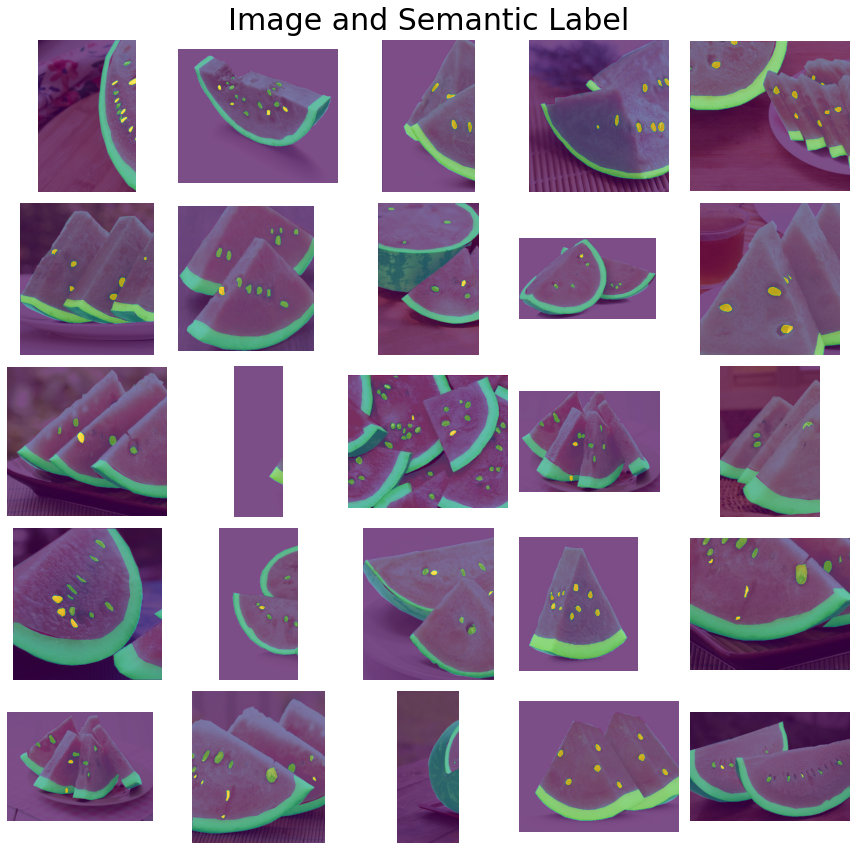

In [14]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.7 # alpha 高亮区域透明度，越小越接近原图

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

## 删除系统自动生成的多余文件

### 查看待删除的多余文件

In [15]:
!find . -iname '__MACOSX'

In [16]:
!find . -iname '.DS_Store'

In [17]:
!find . -iname '.ipynb_checkpoints'

./.ipynb_checkpoints


### 删除多余文件

In [18]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done

In [19]:
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done

In [20]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

### 验证多余文件已删除

In [21]:
!find . -iname '__MACOSX'

In [22]:
!find . -iname '.DS_Store'

In [23]:
!find . -iname '.ipynb_checkpoints'

./.ipynb_checkpoints
